<a href="https://colab.research.google.com/github/Nakulpradeep94/-ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ALMABETTER/Zomato_Restaurant_clustering_and_sentiment_analysis/Zomato Restaurant names and Metadata.csv')
review_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ALMABETTER/Zomato_Restaurant_clustering_and_sentiment_analysis/Zomato Restaurant reviews.csv')

In [4]:
df1.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
df1.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [6]:
df1.shape

(105, 6)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


Note that even the cost feature is an object

In [8]:
df1.describe().T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [9]:
#converting cost column to integer type
df1['Cost']=df1['Cost'].str.replace(",","").astype(int)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


Initially we will only be doing the data checks on the first dataset as clustering is only needed to be done on that dataset alone.So merging will be done later

# **Handling Null Values**

In [11]:
df1.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

so there are 54 null values in collection and 1 null value in timings


In [12]:
# Filling all missing values  in collection
df1['Collections'].fillna('Not Rated',inplace=True)

we have successfully removed all null values in collection column.Now only timing column is left which we can drop as a feature

In [13]:
#checking for duplicate values in the first dataset
df1.duplicated().sum()

0

**Removing unecessary columns**

In [14]:
df1.drop(['Links','Timings'],axis=1,inplace=True)

In [15]:
df1.head()

,Name,Cost,Collections,Cuisines
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I..."
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese"
2,Flechazo,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med..."


Now checking for null values after droping  timing feature

In [16]:
df1.isnull().sum()

Name           0
Cost           0
Collections    0
Cuisines       0
dtype: int64

so there is no more null values

# **Exploratory data Analysis**

Top 10 expensive restaurants

Text(0.5, 1.0, 'Top 10 expensive restaurants')

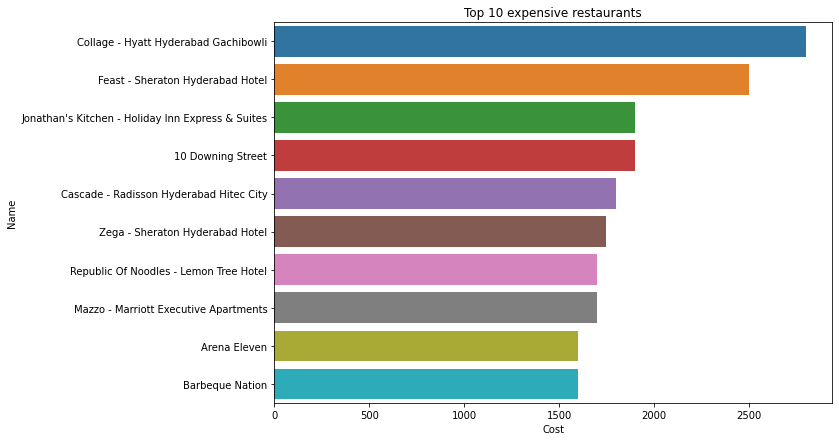

In [17]:
plt.rcParams['figure.figsize']= (10,7)
sns.barplot(x='Cost',y='Name',data=df1.sort_values(by='Cost',ascending=False)[:10])
plt.title("Top 10 expensive restaurants")


Top 10 cheapest restaurants

Text(0.5, 1.0, 'Top 10 cheapest restaurants')

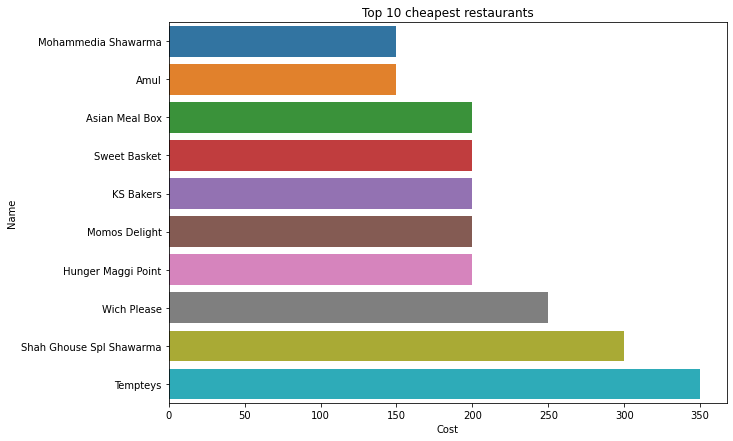

In [18]:
plt.rcParams['figure.figsize']= (10,7)
sns.barplot(x='Cost',y='Name',data=df1.sort_values(by='Cost',ascending=True)[:10])
plt.title("Top 10 cheapest restaurants")

In [19]:
cuisine=df1['Cuisines'].str.split(', ''')

In [20]:
#To extract all cuisines from each of the rows
cuisine_list=[]
for elem in cuisine:
  for subelem in elem:
   cuisine_list.append(subelem)
cuisine_series = pd.Series(cuisine_list)

In [21]:
# Creating DataFrame of Cuisines and their Counts.
cuisine_df = cuisine_series.to_frame(name='Cuisines')
cuisine_df= cuisine_df.value_counts(ascending=False).reset_index()
cuisine_df.rename(columns={0:'Count'},inplace=True)
cuisine_df.head()

,Cuisines,Count
0,North Indian,61
1,Chinese,43
2,Continental,21
3,Biryani,16
4,Asian,15


Text(0.5, 1.0, 'Most popular cuisines')

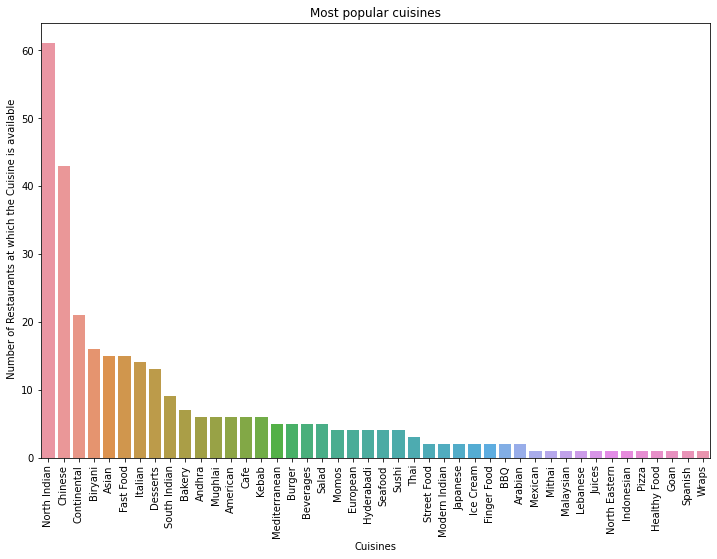

In [22]:
# plot of most served Cuisine in Restaurants
plt.rcParams['figure.figsize']= (12,8)
sns.barplot(data=cuisine_df, x='Cuisines', y= 'Count')
plt.xlabel('Cuisines')
plt.xticks(rotation=90)
plt.ylabel(' Number of Restaurants at which the Cuisine is available')
plt.title('Most popular cuisines')

In [23]:
#creating column to display the number of cuisines offered by a particular restaurant
df1['num_cuisines_offered'] = df1.Cuisines.apply(lambda x: len((x.split(','))))
df1[['Cuisines', 'num_cuisines_offered']]

,Cuisines,num_cuisines_offered
0,"Chinese, Continental, Kebab, European, South I...",6
1,"Biryani, North Indian, Chinese",3
2,"Asian, Mediterranean, North Indian, Desserts",4
3,"Biryani, North Indian, Chinese, Seafood, Bever...",5
4,"Asian, Continental, North Indian, Chinese, Med...",5
...,...,...
100,"Fast Food, Salad",2
101,"Bakery, Mithai",2
102,"North Indian, Biryani, Chinese",3
103,Fast Food,1


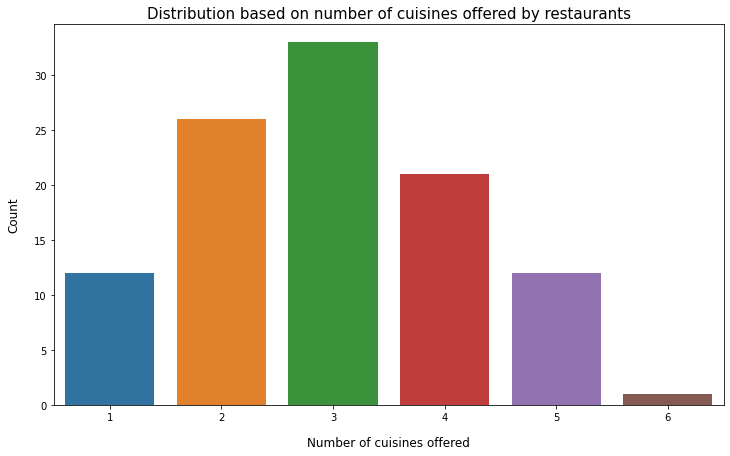

In [24]:
#setting figure size
plt.figure(figsize=(12, 7))

#count plot to display distribution based on number of cuisines offered by restaurants
sns.countplot(data = df1, x = 'num_cuisines_offered')

#To display the x label, y label and title of the bar chart
plt.xlabel("Number of cuisines offered", labelpad=14, fontsize = 12)
plt.ylabel("Count", labelpad=14, fontsize = 12)
plt.title("Distribution based on number of cuisines offered by restaurants", fontsize = 15)
plt.xticks(rotation=360)
plt.show()

# **Zomato Review data**

In [25]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [26]:
review_df.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


In [27]:
review_df.shape

(10000, 7)

In [28]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


**Handling null values**

In [29]:
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [30]:
review_df.isnull().sum().sum()

197

The total null values in the review dataset is 197

In [31]:
(review_df.isnull().sum()*100)/len(review_df)

Restaurant    0.00
Reviewer      0.38
Review        0.45
Rating        0.38
Metadata      0.38
Time          0.38
Pictures      0.00
dtype: float64

The percent of null values is less than 0.5 percent for our data .so we could drop them

In [32]:
#Creating a new copy
review_new_df=review_df.copy()

In [33]:
review_new_df.dropna(inplace=True)

In [100]:
review_new_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

No more null values in the dataset

In [103]:
review_new_df.duplicated().sum()

0

So no duplicate values in the dataset

In [104]:
review_new_df.nunique()

Restaurant     100
Reviewer      7442
Review        9364
Rating          10
Metadata      2477
Time          9775
Pictures        36
dtype: int64

So the number of unique retaurants is same as that of the cluster dataset

In [105]:
review_new_df.describe()

,Pictures
count,9955.000000
mean,0.751984
std,2.575691
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


# **Clustering**

In [34]:
pd.set_option('display.max_columns', None)

In [35]:
cluster_df=df1.copy()


In [36]:
cluster_df.head()

,Name,Cost,Collections,Cuisines,num_cuisines_offered
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",6
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",3
2,Flechazo,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts",4
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",5
4,Over The Moon Brew Company,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...",5


In [37]:
cluster_df['Cuisines'] = cluster_df['Cuisines'].str.replace(' ','')

cluster_df['Cuisines'] = cluster_df['Cuisines'].str.split(',')

In [38]:
cluster_df.head()

,Name,Cost,Collections,Cuisines,num_cuisines_offered
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","[Chinese, Continental, Kebab, European, SouthI...",6
1,Paradise,800,Hyderabad's Hottest,"[Biryani, NorthIndian, Chinese]",3
2,Flechazo,1300,"Great Buffets, Hyderabad's Hottest","[Asian, Mediterranean, NorthIndian, Desserts]",4
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"[Biryani, NorthIndian, Chinese, Seafood, Bever...",5
4,Over The Moon Brew Company,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","[Asian, Continental, NorthIndian, Chinese, Med...",5


In [39]:
s = cluster_df['Cuisines'].explode()
cluster_df=cluster_df[['Name', 'Cost','num_cuisines_offered']].join(pd.crosstab(s.index, s))

In [40]:
cluster_df.head()

,Name,Cost,num_cuisines_offered,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,FastFood,FingerFood,Goan,HealthyFood,Hyderabadi,IceCream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Malaysian,Mediterranean,Mexican,Mithai,ModernIndian,Momos,Mughlai,NorthEastern,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps
0,Beyond Flavours,800,6,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,Paradise,800,3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Flechazo,1300,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800,5,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,Over The Moon Brew Company,1200,5,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [41]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  105 non-null    object
 1   Cost                  105 non-null    int64 
 2   num_cuisines_offered  105 non-null    int64 
 3   American              105 non-null    int64 
 4   Andhra                105 non-null    int64 
 5   Arabian               105 non-null    int64 
 6   Asian                 105 non-null    int64 
 7   BBQ                   105 non-null    int64 
 8   Bakery                105 non-null    int64 
 9   Beverages             105 non-null    int64 
 10  Biryani               105 non-null    int64 
 11  Burger                105 non-null    int64 
 12  Cafe                  105 non-null    int64 
 13  Chinese               105 non-null    int64 
 14  Continental           105 non-null    int64 
 15  Desserts              105 non-null    in

In [42]:
#cluster_df.drop('Name',axis=1,inplace=True)

In [43]:
from sklearn.preprocessing import StandardScaler,normalize

In [44]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cluster_data_sc=sc.fit_transform(cluster_df.iloc[:,1:])
cluster_data_sc.shape

(105, 46)

In [45]:
from sklearn.cluster import KMeans
#within cluster sum of squares
sse_list = []

#using 'for' loop for storing wcss values in the empty list created above
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(cluster_df.iloc[:, 1:])
    sse_list.append(kmeans.inertia_)

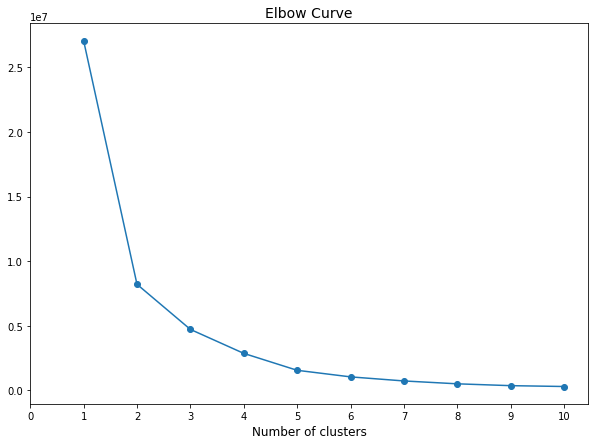

In [46]:
#setting figure size
plt.figure(figsize=(10,7))

#Plotting elbow curve for selecting the value of k
plt.plot(range(1, 11), sse_list,marker = "o")

#To display the x label, y label, title and xticks 
plt.xlabel('Number of clusters', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.title('Elbow Curve', fontsize = 14) 
plt.xticks(ticks = list(range(0, 11)))
plt.show()

From the elbow method we could see that the  optimum number of cluster could be 4 or 5.We can use silhouette coefficient to decide between them

In [47]:
#finding best cluster by silhouette score
from sklearn import metrics

k_range = range(2, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(cluster_df.iloc[:, 1:])
    scores.append(metrics.silhouette_score(cluster_df.iloc[:, 1:], km.labels_))

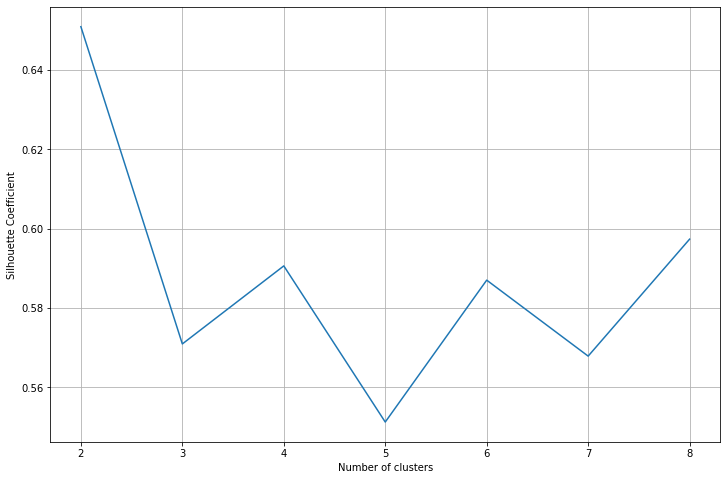

In [48]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

The silhouette score or coefficient  of 6 is better than 5 so we can take optimum number of clusters as 6.

In [60]:
#creating base model
kmeans = KMeans(n_clusters = 6, random_state = 0)

#fitting the model to the dataset
kmeans.fit(cluster_df.iloc[:, 1:])

KMeans(n_clusters=6, random_state=0)

In [61]:
#Predicting the closest cluster each sample in X belongs to
y_cluster = kmeans.predict(cluster_df.iloc[:, 1:])
y_cluster

array([0, 0, 3, 0, 3, 1, 5, 2, 3, 2, 5, 1, 0, 3, 1, 5, 5, 5, 1, 5, 5, 1,
       1, 2, 1, 3, 3, 3, 5, 2, 0, 3, 0, 0, 1, 0, 0, 5, 3, 0, 3, 5, 5, 5,
       3, 0, 1, 0, 5, 5, 0, 5, 5, 3, 2, 0, 4, 5, 2, 2, 3, 3, 5, 0, 5, 1,
       0, 3, 1, 1, 3, 3, 3, 5, 5, 0, 2, 0, 3, 0, 5, 5, 0, 5, 0, 2, 5, 5,
       5, 2, 1, 1, 4, 5, 5, 5, 5, 1, 5, 3, 5, 2, 5, 2, 1], dtype=int32)

In [62]:
#unique clusters with its count
np.unique(y_cluster, return_counts = True)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([21, 16, 12, 20,  2, 34]))

In [63]:
# Making label column
cluster_df['labels'] = y_cluster

In [ ]:
cluster_df.head()

,Name,Cost,num_cuisines_offered,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,FastFood,FingerFood,Goan,HealthyFood,Hyderabadi,IceCream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Malaysian,Mediterranean,Mexican,Mithai,ModernIndian,Momos,Mughlai,NorthEastern,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,labels
0,Beyond Flavours,800,6,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,Paradise,800,3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Flechazo,1300,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,Shah Ghouse Hotel & Restaurant,800,5,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,Over The Moon Brew Company,1200,5,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [64]:
#Creating an array
x = np.array(cluster_df)

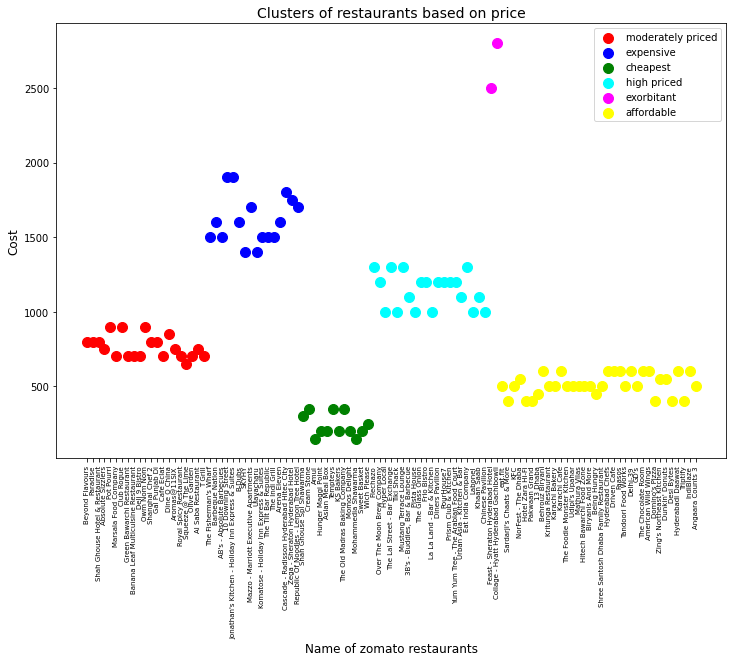

In [68]:
#Scatter plot of 1st and second column
plt.scatter(x[y_cluster==0, 0], x[y_cluster==0, 1], s=100, c='red', label ='moderately priced')
plt.scatter(x[y_cluster==1, 0], x[y_cluster==1, 1], s=100, c='blue', label ='expensive')
plt.scatter(x[y_cluster==2, 0], x[y_cluster==2, 1], s=100, c='green', label ='cheapest')
plt.scatter(x[y_cluster==3, 0], x[y_cluster==3, 1], s=100, c='cyan', label ='high priced')
plt.scatter(x[y_cluster==4, 0], x[y_cluster==4, 1], s=100, c='magenta', label ='exorbitant')
plt.scatter(x[y_cluster==5, 0], x[y_cluster==5, 1], s=100, c='yellow', label ='affordable')
#To display the x label, y label, title and xticks 
plt.title('Clusters of restaurants based on price', fontsize = 14)
plt.xlabel('Name of zomato restaurants', fontsize = 12)
plt.ylabel('Cost', fontsize = 12)
plt.xticks(fontsize=7, rotation = 90)
plt.legend()
plt.show()

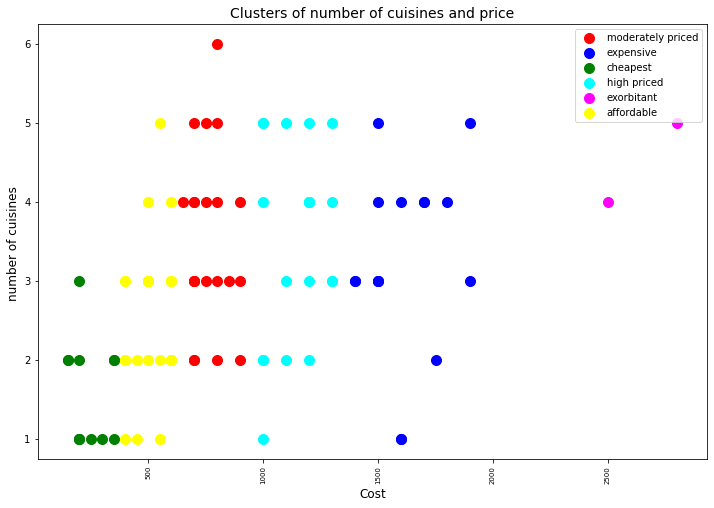

In [70]:
#Scatter plot of first and third column ie name and no of cuisines ordered
plt.scatter(x[y_cluster==0, 1], x[y_cluster==0, 2], s=100, c='red', label ='moderately priced')
plt.scatter(x[y_cluster==1, 1], x[y_cluster==1, 2], s=100, c='blue', label ='expensive')
plt.scatter(x[y_cluster==2, 1], x[y_cluster==2, 2], s=100, c='green', label ='cheapest')
plt.scatter(x[y_cluster==3, 1], x[y_cluster==3, 2], s=100, c='cyan', label ='high priced')
plt.scatter(x[y_cluster==4, 1], x[y_cluster==4, 2], s=100, c='magenta', label ='exorbitant')
plt.scatter(x[y_cluster==5, 1], x[y_cluster==5, 2], s=100, c='yellow', label ='affordable')

#To display the x label, y label, title and xticks 
plt.title('Clusters of number of cuisines and price', fontsize = 14)
plt.xlabel('Cost', fontsize = 12)
plt.ylabel('number of cuisines ', fontsize = 12)
plt.xticks(fontsize=7, rotation = 90)
plt.legend()
plt.show()

In [71]:
#Cluster of exorbitant restaurants
cluster_df[y_cluster==4]

,Name,Cost,num_cuisines_offered,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,FastFood,FingerFood,Goan,HealthyFood,Hyderabadi,IceCream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Malaysian,Mediterranean,Mexican,Mithai,ModernIndian,Momos,Mughlai,NorthEastern,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,labels
56,Feast - Sheraton Hyderabad Hotel,2500,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4
92,Collage - Hyatt Hyderabad Gachibowli,2800,5,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4


In [74]:
#Cluster of cheapest restaurants
cluster_df[y_cluster==2].sort_values(by='Cost').head()

,Name,Cost,num_cuisines_offered,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,FastFood,FingerFood,Goan,HealthyFood,Hyderabadi,IceCream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Malaysian,Mediterranean,Mexican,Mithai,ModernIndian,Momos,Mughlai,NorthEastern,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,labels
23,Amul,150,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
89,Mohammedia Shawarma,150,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2
29,Hunger Maggi Point,200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
54,Asian Meal Box,200,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
59,KS Bakers,200,3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [93]:
heirarch_df=cluster_df.iloc[:,0:-1]

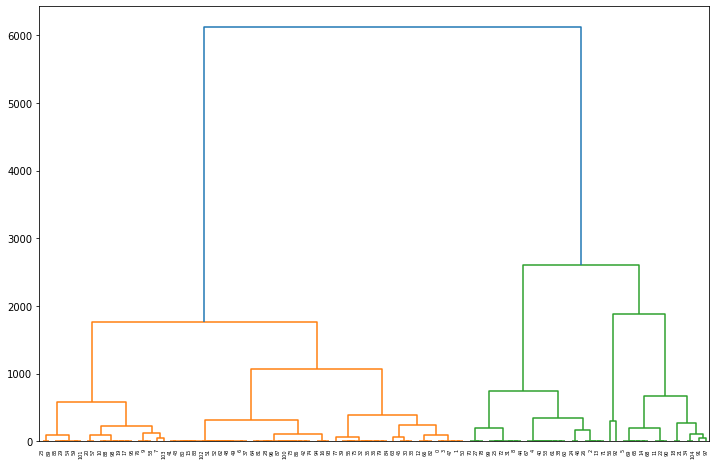

In [95]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(heirarch_df.iloc[:,1:], method='ward'))

In [91]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
model.fit(heirarch_df)
labels = model.labels_

In [97]:
h = np.array(heirarch_df)

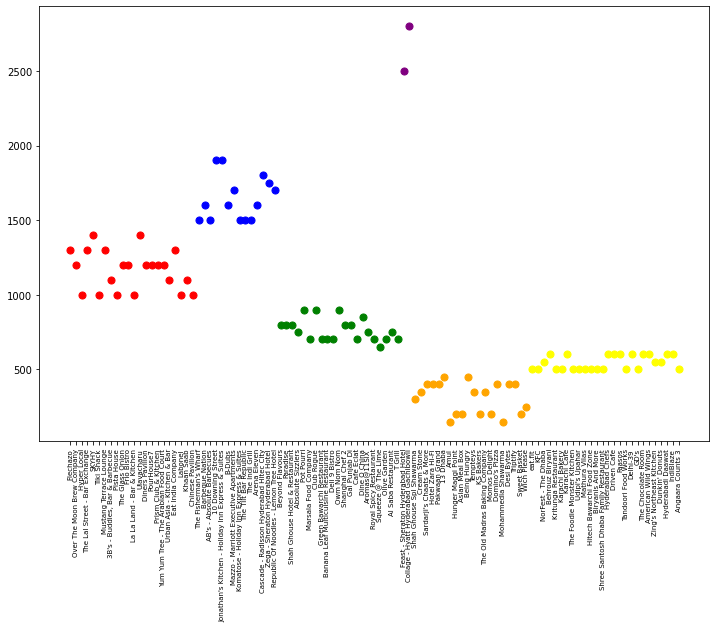

In [99]:
plt.scatter(h[labels==0, 0], h[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(h[labels==1, 0], h[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(h[labels==2, 0], h[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(h[labels==3, 0], h[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(h[labels==4, 0], h[labels==4, 1], s=50, marker='o', color='orange')
plt.scatter(h[labels==5, 0], h[labels==5, 1], s=50, marker='o', color='yellow')
plt.xticks(fontsize=7, rotation = 90)
plt.show()